In [1]:
"""
Analyse de la complexité des recettes
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def load_data():
    """Charge les données"""
    df = pd.read_csv("../data/RAW_recipes.csv")
    
    # Extraire nutrition
    df['calories'] = df['nutrition'].apply(lambda x: eval(x)[0])
    
    # Filtrer outliers
    df = df[(df['minutes'] <= 500) & (df['n_ingredients'] <= 50)]
    
    return df

In [3]:
def categorize_complexity(df):
    """Catégorise les recettes par niveau de complexité"""
    
    print("\n" + "="*60)
    print("ANALYSE DE LA COMPLEXITÉ")
    print("="*60)
    
    # Créer un score de complexité composite
    # Normaliser chaque variable entre 0 et 1
    df['time_score'] = (df['minutes'] - df['minutes'].min()) / (df['minutes'].max() - df['minutes'].min())
    df['ingredient_score'] = (df['n_ingredients'] - df['n_ingredients'].min()) / (df['n_ingredients'].max() - df['n_ingredients'].min())
    df['step_score'] = (df['n_steps'] - df['n_steps'].min()) / (df['n_steps'].max() - df['n_steps'].min())
    
    # Score composite (moyenne pondérée)
    df['complexity_score'] = (
        0.3 * df['time_score'] + 
        0.4 * df['ingredient_score'] + 
        0.3 * df['step_score']
    )
    
    # Catégoriser
    df['complexity_level'] = pd.cut(
        df['complexity_score'],
        bins=[0, 0.25, 0.5, 0.75, 1.0],
        labels=['Facile', 'Moyen', 'Difficile', 'Expert']
    )
    
    # Statistiques
    complexity_counts = df['complexity_level'].value_counts()
    
    print(f"\n Distribution par niveau de complexité:")
    for level in ['Facile', 'Moyen', 'Difficile', 'Expert']:
        if level in complexity_counts.index:
            count = complexity_counts[level]
            pct = count / len(df) * 100
            print(f"  {level:12s} : {count:6,} recettes ({pct:5.1f}%)")
    
    # Caractéristiques moyennes par niveau
    print(f"\n Caractéristiques moyennes par niveau:")
    print(f"\n{'Niveau':<12} {'Minutes':>8} {'Ingrédients':>12} {'Étapes':>8}")
    print("-" * 45)
    for level in ['Facile', 'Moyen', 'Difficile', 'Expert']:
        if level in df['complexity_level'].values:
            subset = df[df['complexity_level'] == level]
            print(f"{level:<12} {subset['minutes'].mean():>8.1f} {subset['n_ingredients'].mean():>12.1f} {subset['n_steps'].mean():>8.1f}")
    
    # Visualisations
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # Distribution des niveaux (pie chart)
    colors = ['#90EE90', '#FFD700', '#FF8C00', '#DC143C']
    axes[0, 0].pie(complexity_counts, labels=complexity_counts.index, autopct='%1.1f%%',
                   colors=colors, startangle=90, explode=[0.05, 0.05, 0.05, 0.05])
    axes[0, 0].set_title('Distribution des niveaux de complexité', fontsize=13, fontweight='bold')
    
    # Boxplot des temps par niveau
    df.boxplot(column='minutes', by='complexity_level', ax=axes[0, 1])
    axes[0, 1].set_title('Temps de cuisson par niveau', fontsize=13, fontweight='bold')
    axes[0, 1].set_xlabel('Niveau de complexité')
    axes[0, 1].set_ylabel('Minutes')
    plt.sca(axes[0, 1])
    plt.xticks(rotation=45)
    
    # Boxplot des ingrédients par niveau
    df.boxplot(column='n_ingredients', by='complexity_level', ax=axes[1, 0])
    axes[1, 0].set_title('Nombre d\'ingrédients par niveau', fontsize=13, fontweight='bold')
    axes[1, 0].set_xlabel('Niveau de complexité')
    axes[1, 0].set_ylabel('Nombre d\'ingrédients')
    plt.sca(axes[1, 0])
    plt.xticks(rotation=45)
    
    # Boxplot des étapes par niveau
    df.boxplot(column='n_steps', by='complexity_level', ax=axes[1, 1])
    axes[1, 1].set_title('Nombre d\'étapes par niveau', fontsize=13, fontweight='bold')
    axes[1, 1].set_xlabel('Niveau de complexité')
    axes[1, 1].set_ylabel('Nombre d\'étapes')
    plt.sca(axes[1, 1])
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    plt.show()
    
    return df

In [4]:
def analyze_quick_recipes(df):
    """Analyse des recettes rapides (≤30 minutes)"""
    
    print("\n" + "="*60)
    print("ANALYSE DES RECETTES RAPIDES")
    print("="*60)
    
    quick_recipes = df[df['minutes'] <= 30]
    
    print(f"\n Recettes rapides (≤30 min):")
    print(f"  Nombre: {len(quick_recipes):,} ({len(quick_recipes)/len(df)*100:.1f}%)")
    print(f"  Ingrédients moyens: {quick_recipes['n_ingredients'].mean():.1f}")
    print(f"  Étapes moyennes: {quick_recipes['n_steps'].mean():.1f}")
    print(f"  Calories moyennes: {quick_recipes['calories'].mean():.0f}")

 Chargement des données...
 227,299 recettes chargées


ANALYSE DE LA COMPLEXITÉ

 Distribution par niveau de complexité:
  Facile       : 214,831 recettes ( 94.5%)
  Moyen        : 12,412 recettes (  5.5%)
  Difficile    :     56 recettes (  0.0%)
  Expert       :      0 recettes (  0.0%)

 Caractéristiques moyennes par niveau:

Niveau        Minutes  Ingrédients   Étapes
---------------------------------------------
Facile           45.6          8.8      9.4
Moyen           274.0         13.5     15.4
Difficile       400.6         24.6     35.0


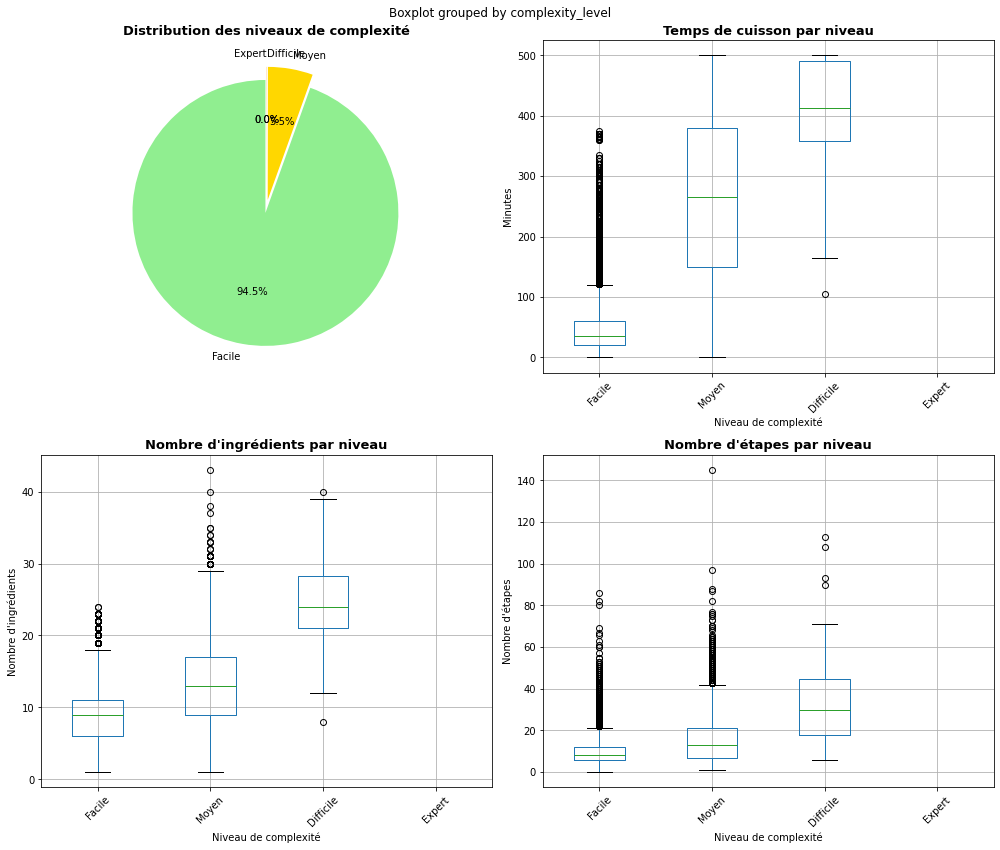


ANALYSE DES RECETTES RAPIDES

 Recettes rapides (≤30 min):
  Nombre: 99,053 (43.6%)
  Ingrédients moyens: 7.7
  Étapes moyennes: 7.5
  Calories moyennes: 381


In [6]:

def main():
    """Fonction principale"""
    
    print(" Chargement des données...")
    df = load_data()
    print(f" {len(df):,} recettes chargées\n")
    
    df = categorize_complexity(df)
    analyze_quick_recipes(df)
    


if __name__ == "__main__":
    main()